I've been working with the Heart Attack Analysis & Prediction dataset I found on Kaggle. Here's the link to the dataset: Heart Attack Analysis & Prediction Dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.linear_model import SGDRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

**Displaying the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute.**

In [4]:
# Load the data
df = pd.read_csv("heart.csv")

Statistical descriptions

In [5]:
# Display summary statistics
statistics = df.describe()
print(statistics)

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

Visualizations

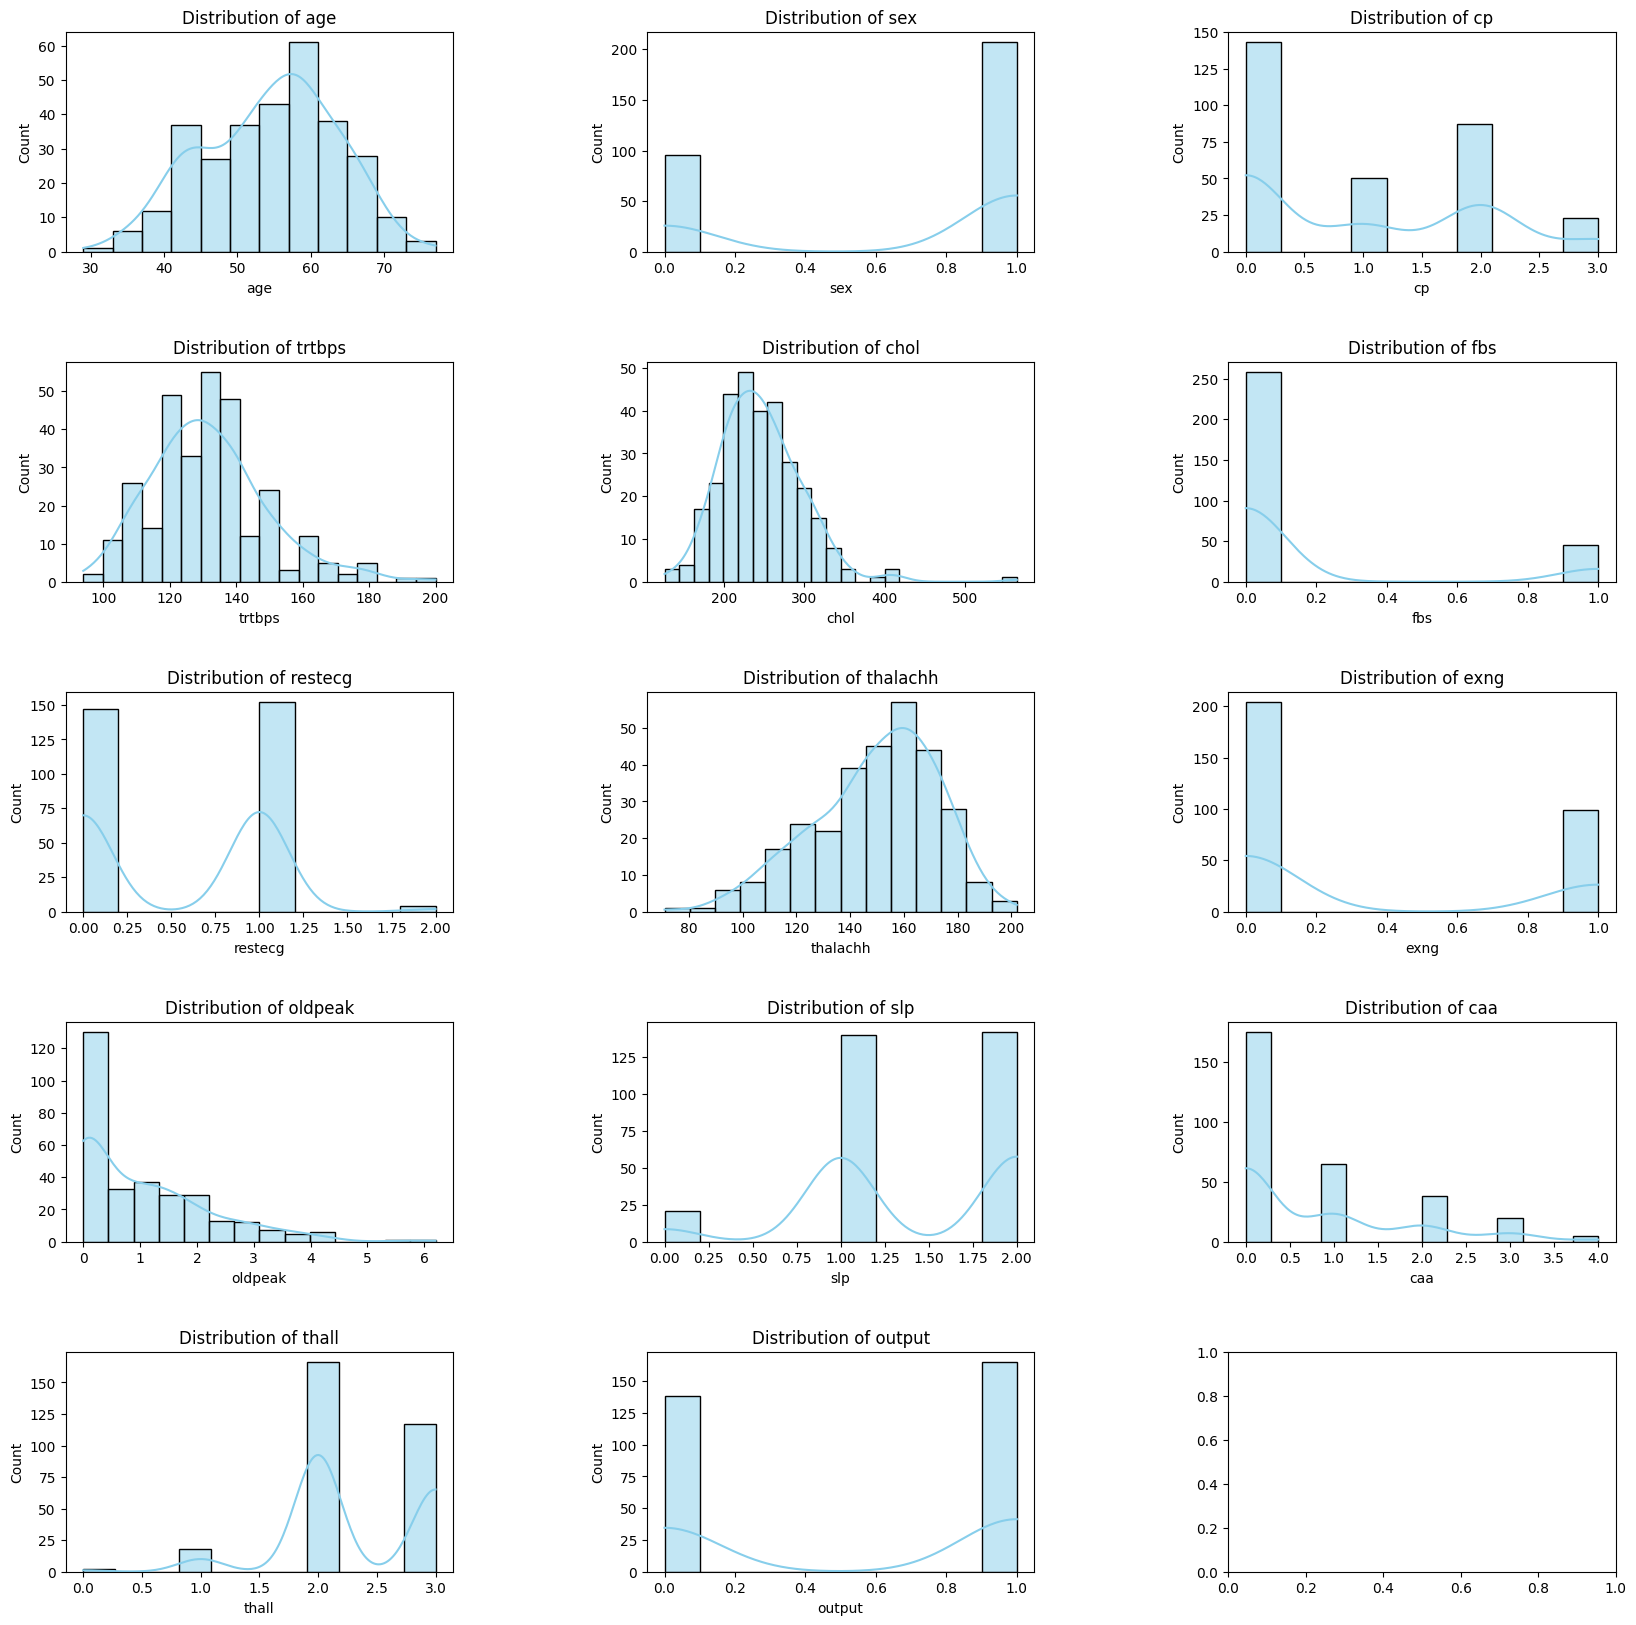

In [6]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Plot histograms for each attribute
for i, col in enumerate(df):
    sns.histplot(df[col], ax=axes[i//3, i%3], kde=True, color='skyblue').set(title=f'Distribution of {col}')

plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There are no categorical attributes and there are no missing values, outliers
Hence no transformations are required

**2. Analyzing and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.**

Computing the PCC & Scatter Plots

               age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slp      -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thall     0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

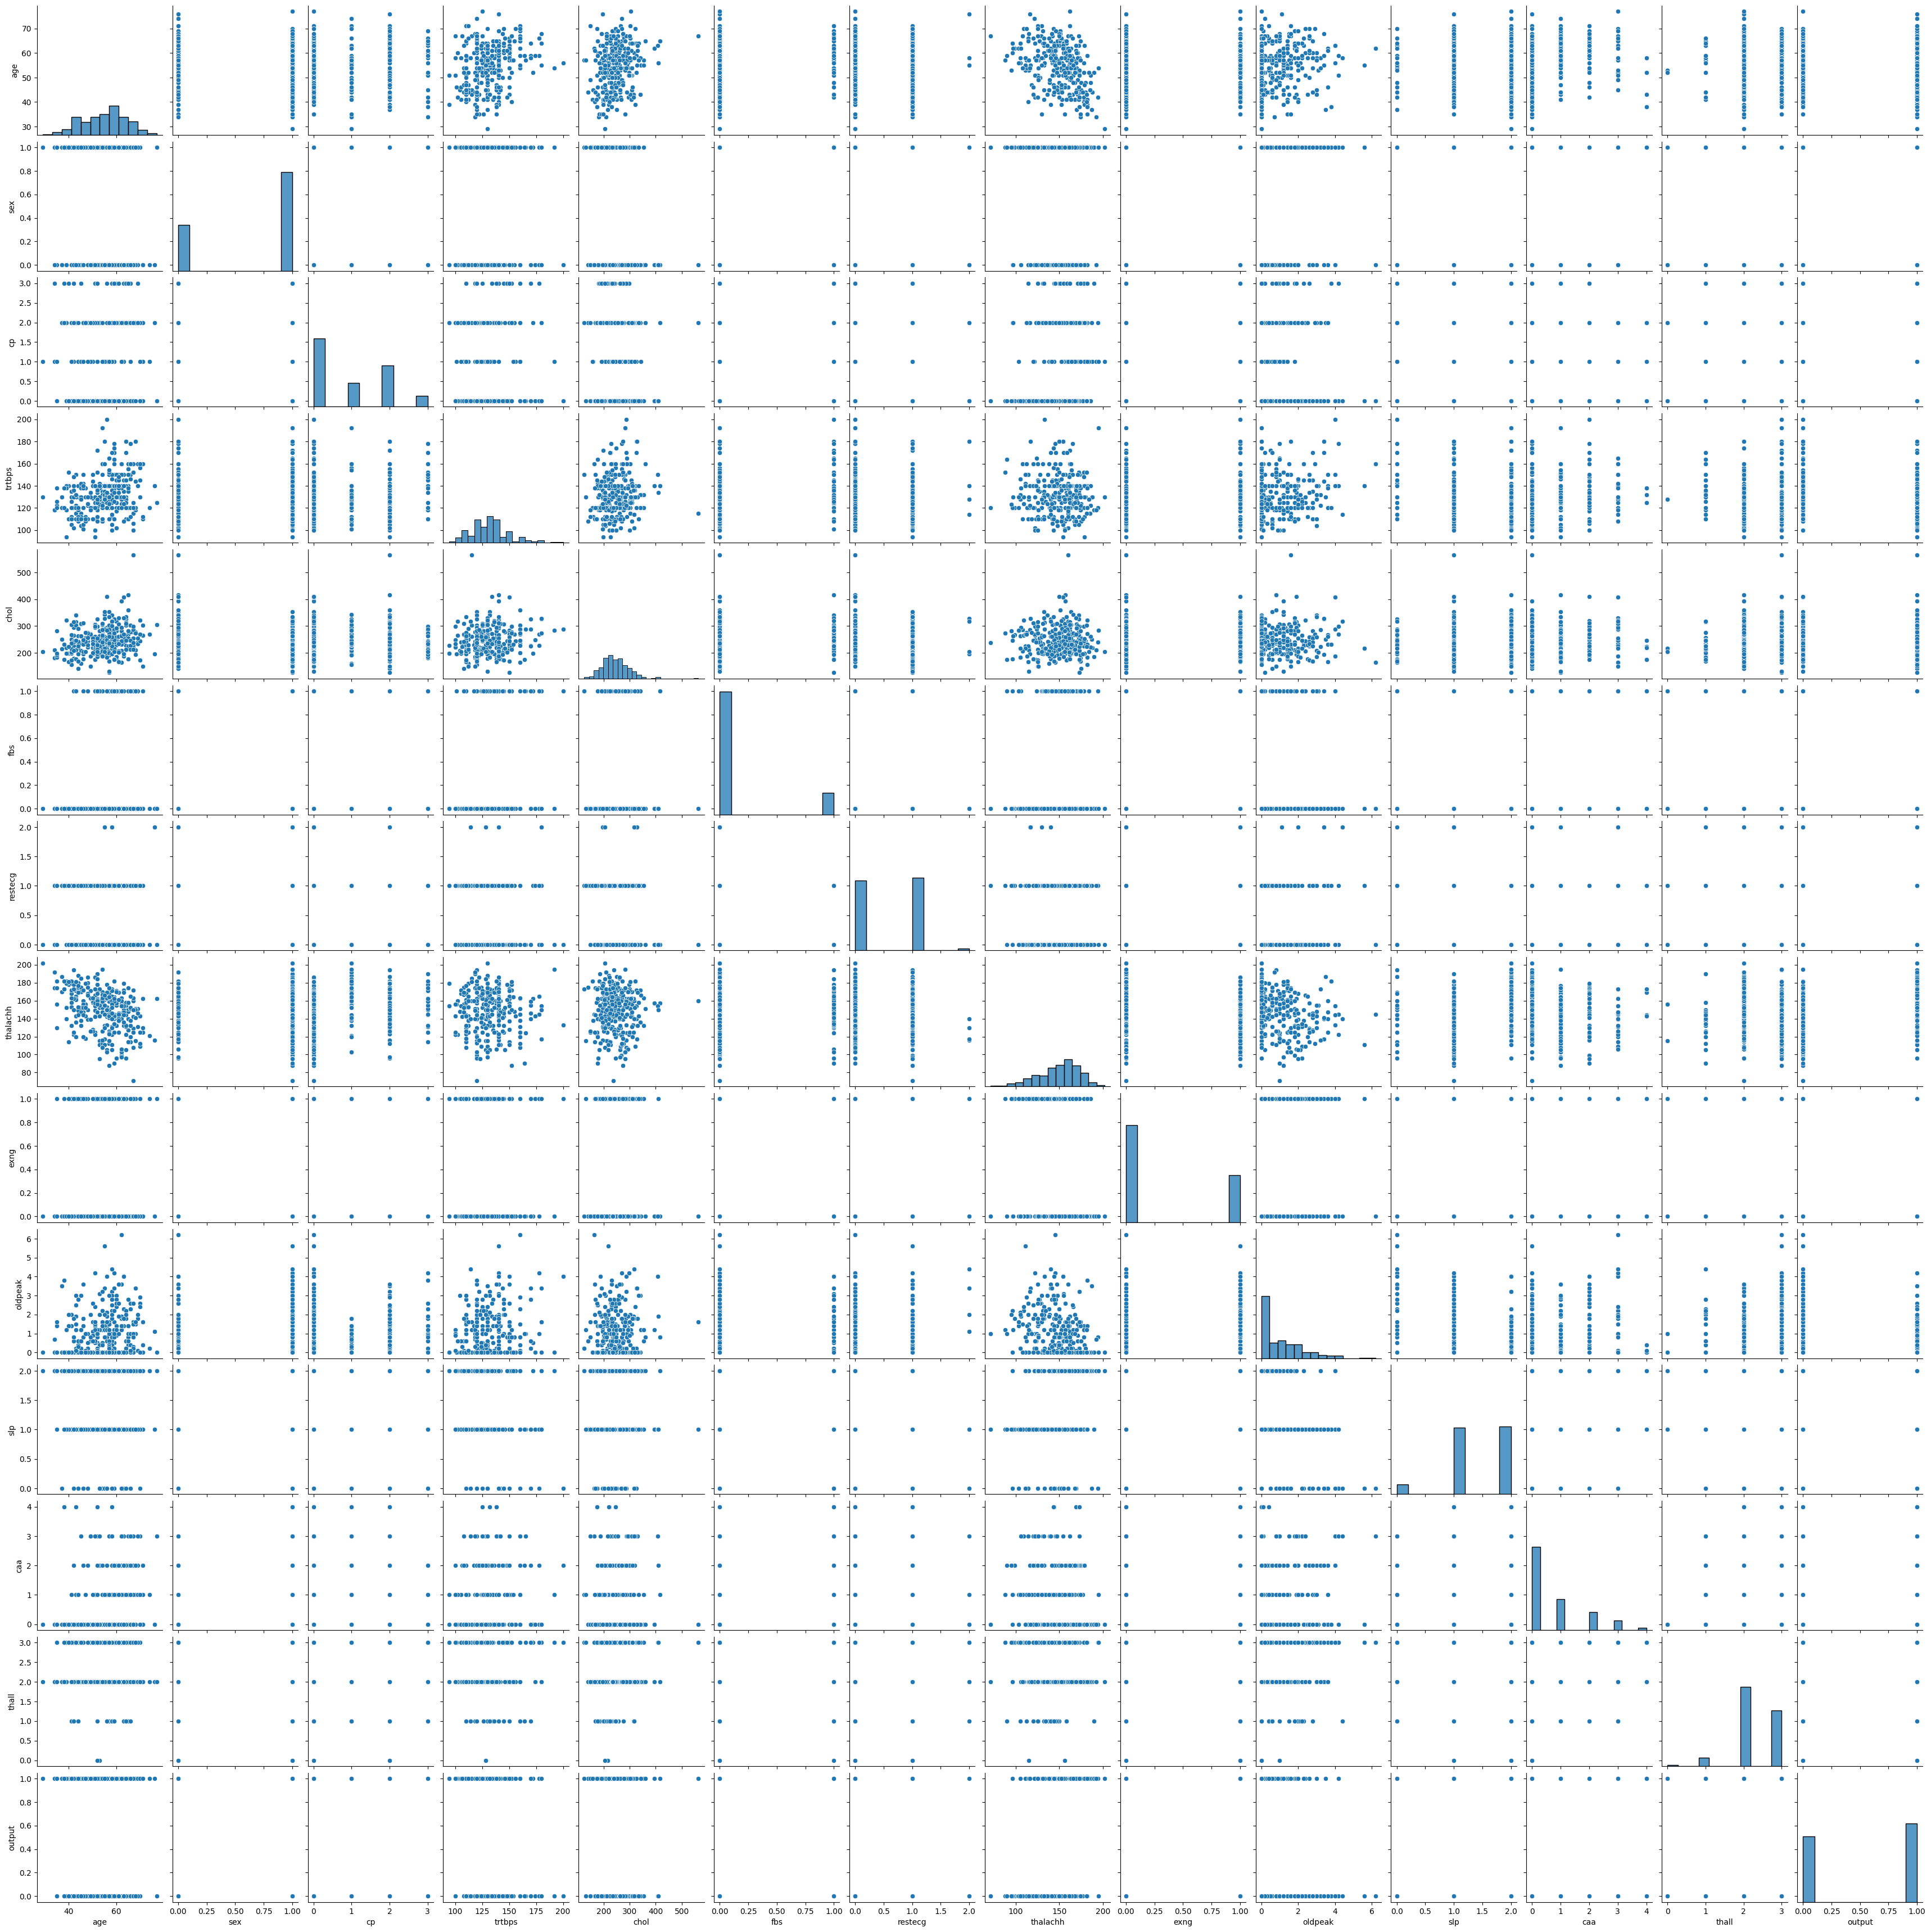

In [9]:
correlation_matrix = df.corr()
print(correlation_matrix)
sns.pairplot(df)
plt.show()

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64


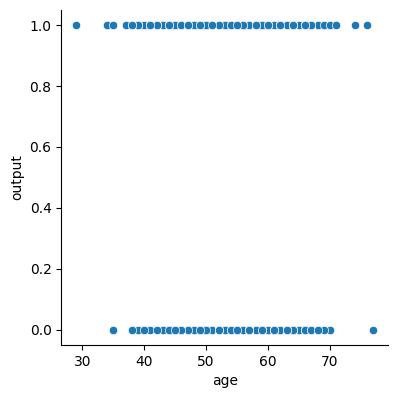

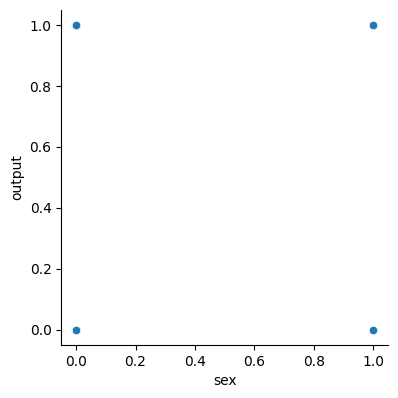

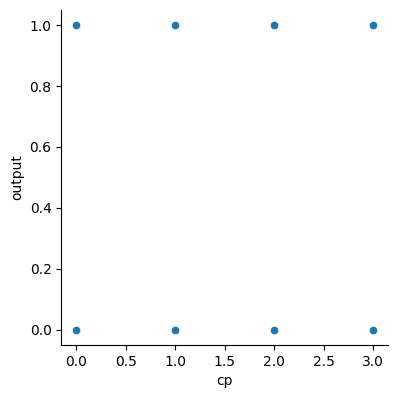

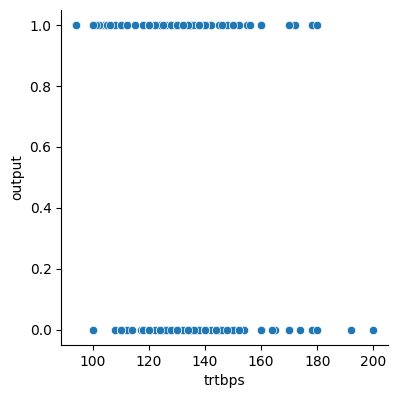

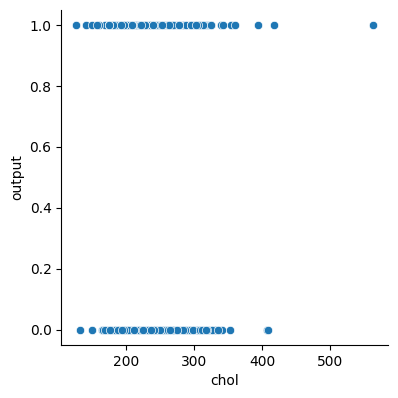

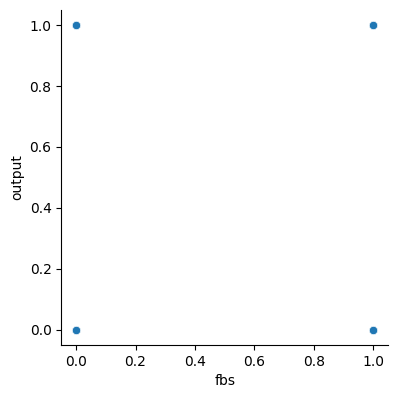

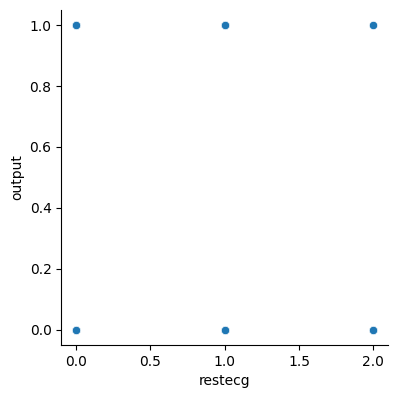

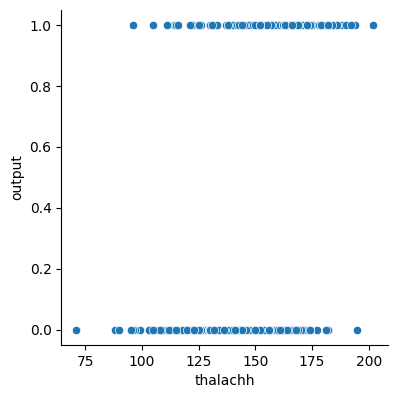

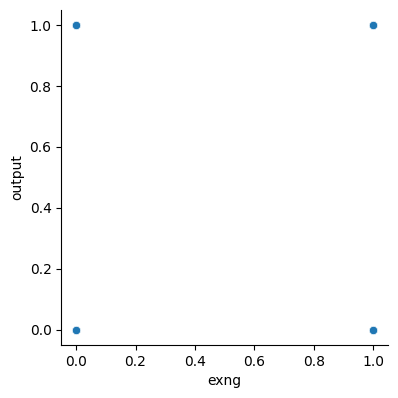

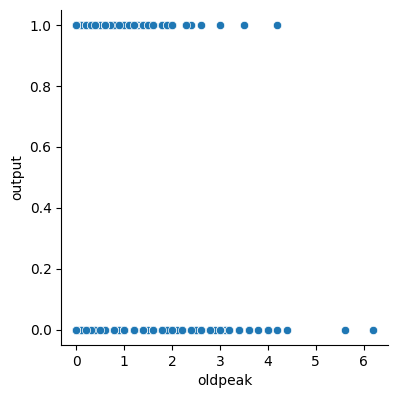

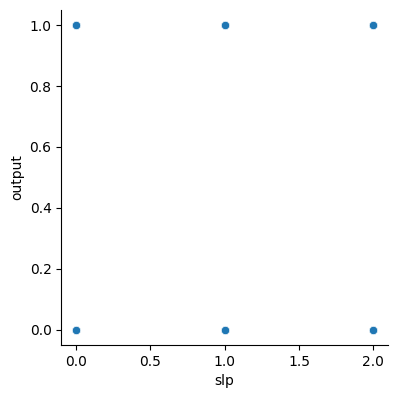

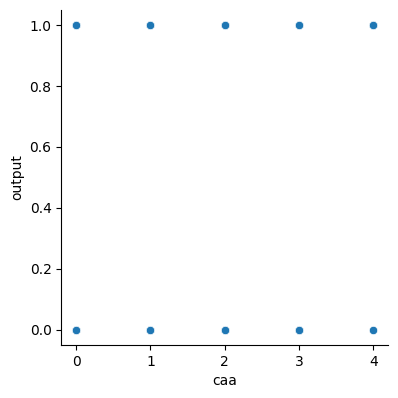

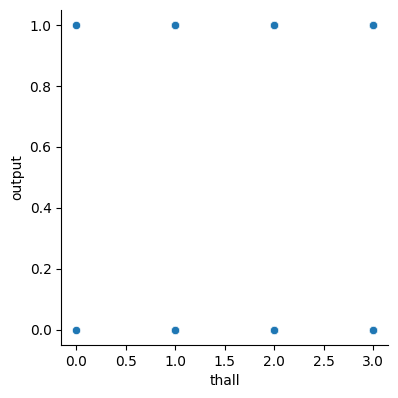

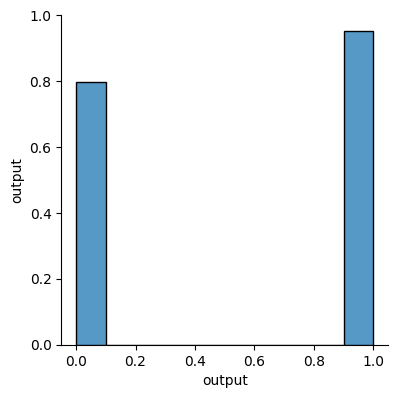

In [10]:
correlations_matrix_2 = (df).corr()
print(correlations_matrix_2["output"].sort_values(ascending=False))


for attr in df.columns:
  sns.pairplot(data=df, x_vars=[attr], y_vars=["output"], kind="scatter", height=4)
  plt.show()

Positive Correlation (closer to 1 indicates a stronger positive relationship):

cp (chest pain type) and thalachh (maximum heart rate achieved) show moderate positive correlations with the output, indicating that higher values of these attributes are associated with a higher likelihood of the outcome.
slp (slope of the peak exercise ST segment) and restecg (resting electrocardiographic results) show weaker positive correlations, suggesting a lesser but still positive association with the outcome.

Negative Correlation (closer to -1 indicates a stronger negative relationship):

exng (exercise induced angina), oldpeak (ST depression induced by exercise relative to rest), caa (number of major vessels colored by fluoroscopy), and thall (thalassemia) are negatively correlated with output, indicating that higher values are associated with a lower likelihood of the outcome.
sex (gender), age, trtbps (resting blood pressure), chol (serum cholesterol), and fbs (fasting blood sugar) also show negative correlations with varying strengths, suggesting that higher values may decrease the likelihood of the outcome, though to a lesser extent for some of these factors.

fbs(Fasting blood sugar), chol(Cholestrol) exhibit minimal correlations with the label.

In [11]:
# Drop the specified columns from the DataFrame
df_updated=df.copy()
df_updated.drop(columns=['fbs','chol'],axis=1, inplace=True)

**PreProcessing**

In [12]:
attributes = ['age', 'sex', 'cp', 'trtbps', 'restecg',
              'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']

# Creating a pipeline for numerical data
num_con_pipeline = make_pipeline(StandardScaler())

# Applying ColumnTransformer to the specified attributes
prep = ColumnTransformer([
    ("cont", num_con_pipeline, attributes)
])

# Assuming 'df' is your DataFrame and you've separated features and label ('output')
X = df_updated.drop('output', axis=1)
y = df['output']

# Transforming the features
X_transformed = prep.fit_transform(X)

# Converting transformed features back to DataFrame with meaningful column names
X_transformed_df = pd.DataFrame(X_transformed, columns=prep.get_feature_names_out(), index=X.index)

# Now, X_transformed_df contains the standardized features, ready for modeling.


In [13]:
X_transformed_df

,cont__age,cont__sex,cont__cp,cont__trtbps,cont__restecg,cont__thalachh,cont__exng,cont__oldpeak,cont__slp,cont__caa,cont__thall
0,0.952197,0.681005,1.973123,0.763956,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,0.681005,1.973123,-1.234996,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,0.681005,-0.938515,0.706843,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
301,0.290464,0.681005,-0.938515,-0.092738,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029


**3. Spliting training data, for validation, and for testing.**

In [14]:
X = X_transformed_df
# First split: Separate out the training set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Second split: Divide the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 181
Validation set size: 61
Test set size: 61


Verification of splitting

In [15]:
X_train.describe()

,cont__age,cont__sex,cont__cp,cont__trtbps,cont__restecg,cont__thalachh,cont__exng,cont__oldpeak,cont__slp,cont__caa,cont__thall
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,0.039419,-0.055261,0.074928,0.014231,-0.037649,-0.012825,0.033706,-0.017008,-0.020480,-0.086676,0.020344
std,0.999323,1.022859,1.022140,0.977338,0.975788,1.024189,1.014621,0.932945,1.005865,0.910873,0.988874
min,-2.246179,-1.468418,-0.938515,-2.148802,-1.005832,-2.695849,-0.696631,-0.896862,-2.274579,-0.714429,-3.784824
25%,-0.591847,-1.468418,-0.938515,-0.663867,-1.005832,-0.771706,-0.696631,-0.896862,-0.649113,-0.714429,-0.512922
50%,0.180175,0.681005,0.032031,-0.092738,0.898962,0.190365,-0.696631,-0.206705,-0.649113,-0.714429,-0.512922
75%,0.731619,0.681005,1.002577,0.478391,0.898962,0.802592,1.435481,0.483451,0.976352,0.265082,1.123029
max,2.496240,0.681005,1.973123,3.448262,2.803756,1.983316,1.435481,3.934233,0.976352,2.224104,1.123029


In [16]:
X_test.describe()

,cont__age,cont__sex,cont__cp,cont__trtbps,cont__restecg,cont__thalachh,cont__exng,cont__oldpeak,cont__slp,cont__caa,cont__thall
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,-0.004243,-0.023724,0.032031,-0.012218,-0.069048,0.039817,-0.102435,-0.003053,-0.036233,-0.056069,-0.030182
std,0.980624,1.017392,0.954233,1.150480,1.078802,1.023285,0.963874,1.067448,1.035033,1.007220,0.913024
min,-2.246179,-1.468418,-0.938515,-2.148802,-1.005832,-3.439267,-0.696631,-0.896862,-2.274579,-0.714429,-2.148873
25%,-0.922713,-1.468418,-0.938515,-0.663867,-1.005832,-0.509323,-0.696631,-0.896862,-0.649113,-0.714429,-0.512922
50%,0.180175,0.681005,0.032031,-0.206964,-1.005832,0.190365,-0.696631,-0.292975,-0.649113,-0.714429,-0.512922
75%,0.621330,0.681005,1.002577,0.478391,0.898962,0.715131,1.435481,0.483451,0.976352,0.265082,1.123029
max,2.385951,0.681005,1.973123,3.905165,2.803756,1.852124,1.435481,4.451851,0.976352,3.203615,1.123029


In [17]:
X_val.describe()

,cont__age,cont__sex,cont__cp,cont__trtbps,cont__restecg,cont__thalachh,cont__exng,cont__oldpeak,cont__slp,cont__caa,cont__thall
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,-0.112723,0.187695,-0.254359,-0.030007,0.180761,-0.001763,0.002422,0.053518,0.097002,0.313255,-0.030182
std,1.036732,0.911369,0.959880,0.926902,0.993659,0.924059,1.009198,1.138245,0.965010,1.191979,1.131224
min,-2.797624,-1.468418,-0.938515,-1.806125,-1.005832,-2.214813,-0.696631,-0.896862,-2.274579,-0.714429,-3.784824
25%,-0.922713,0.681005,-0.938515,-0.663867,-1.005832,-0.421862,-0.696631,-0.896862,-0.649113,-0.714429,-0.512922
50%,-0.040403,0.681005,-0.938515,-0.092738,0.898962,0.059173,-0.696631,-0.551783,0.976352,0.265082,-0.512922
75%,0.511041,0.681005,0.032031,0.478391,0.898962,0.583939,1.435481,0.655990,0.976352,1.244593,1.123029
max,1.834507,0.681005,1.973123,2.191778,2.803756,2.289429,1.435481,2.898999,0.976352,3.203615,1.123029


If we look at the data given by test and validate describe , the mean , median and standard deviation and the quartile range looks similiar. This means test, validate portion of the data is the representative of the entire dataset.

The consistency across training, validation, and test sets regarding key statistical measures supports the validity of your data splitting strategy. It suggests that any conclusions drawn from the model's performance on the validation and test sets should be applicable to the entire dataset.

**4. Train different classifiers and tweak the hyperparameters to improve performance (use the grid search if you want or manually try different values). Reporting training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters**

A. Multinomial Logistic Regression (softmax regression); hyperparameters to
explore: C, solver, max number of iterations. [10 points]

In [18]:
from sklearn.linear_model import LogisticRegression as lg
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')


# Hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'max_iter': [100, 200, 300, 400, 500]}

sfmax_reg = lg(multi_class="multinomial", solver="lbfgs", C=10)

grid = GridSearchCV(sfmax_reg, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

best_params = grid.best_params_

best_sf_train = lg(multi_class="multinomial", **best_params)
best_sf_train.fit(X_train, y_train)

# Make predictions on the training, validation, and test sets
train_predictions = best_sf_train.predict(X_train)
val_predictions = best_sf_train.predict(X_val)
test_predictions = best_sf_train.predict(X_test)

# Calculate accuracy for training, validation, and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
val_accuracy = accuracy_score(y_val, val_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Calculate F1 scores, precision, and recall for training set
precision_train = precision_score(y_train, train_predictions, average='weighted')
recall_train = recall_score(y_train, train_predictions, average='weighted')
f1_train = f1_score(y_train, train_predictions, average='weighted')

# Calculate F1 scores, precision, and recall for validation set
precision_val = precision_score(y_val, val_predictions, average='weighted')
recall_val = recall_score(y_val, val_predictions, average='weighted')
f1_val = f1_score(y_val, val_predictions, average='weighted')

# Calculate F1 scores, precision, and recall for test set
precision_test = precision_score(y_test, test_predictions, average='weighted')
recall_test = recall_score(y_test, test_predictions, average='weighted')
f1_test = f1_score(y_test, test_predictions, average='weighted')

# Print results for Logistic Regression model
print("Logistic Regression Model Results:")
print("\nTraining Set:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")

print("\nValidation Set:")
print(f"Accuracy: {val_accuracy}")
print(f"Precision: {precision_val}")
print(f"Recall: {recall_val}")
print(f"F1 Score: {f1_val}")

print("\nTest Set:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")

print(f"\nBest parameters: {best_params}")


Logistic Regression Model Results:

Training Set:
Accuracy: 0.8839779005524862
Precision: 0.8872750177998796
Recall: 0.8839779005524862
F1 Score: 0.8833984517714492

Validation Set:
Accuracy: 0.8688524590163934
Precision: 0.8711440155120748
Recall: 0.8688524590163934
F1 Score: 0.8690644431882419

Test Set:
Accuracy: 0.8032786885245902
Precision: 0.8032786885245902
Recall: 0.8032786885245902
F1 Score: 0.8032786885245902

Best parameters: {'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}


C (Regularization Parameter): Your observations indicate that the grid search found the optimal C value to be 1, exploring a range from 0.001 to 100. This optimal value points towards the effectiveness of moderate regularization in enhancing the model's performance. Moderate regularization helps in avoiding overfitting while still allowing the model to learn complex patterns, striking a balance between bias and variance.

Solver: Among the solvers 'newton-cg', 'lbfgs', and 'liblinear' considered during the grid search, 'newton-cg' emerged as the best solver. This indicates that for this particular logistic regression model, especially in the context of multiclass softmax regression, the Newton-Conjugate Gradient solver optimizes the cost function most efficiently. The choice of 'newton-cg' suggests that it effectively deals with the logistic regression's mathematical characteristics and data structure, contributing to higher cross-validated accuracy.

Max_iter (Maximum Number of Iterations): The grid search tested values from 100 to 500 for max_iter, with 100 being identified as the best-performing value. This outcome implies that the optimization algorithm converges swiftly, within the first 100 iterations, which is advantageous for computational efficiency. Early convergence without sacrificing accuracy indicates that the initial parameters are adequately close to the optimal solution or that the model is well-structured to reach an optimal solution quickly.

Summary:
The identified optimal hyperparameters—C=1 for regularization strength, 'newton-cg' as the solver, and 100 maximum iterations—demonstrate a well-tuned logistic regression model for your dataset. These parameters collectively contribute to the model's strong performance by ensuring a good fit to the data, efficient optimization, and prevention of overfitting. The choice of a moderate regularization level, combined with an effective solver and a relatively low number of iterations, reflects a strategic approach to balancing model complexity, convergence speed, and regularization to achieve optimal performance in predicting the outcomes of your multiclass softmax regression model.

**B. Support vector machines (make sure to try using kernels); hyperparameters : C, kernel, degree of polynomial kernel, gamma.**

In [19]:
from sklearn.svm import SVC

param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'degree': [2, 3, 4],
                  'gamma': ['scale', 'auto']}

svm_model = SVC()

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=3, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

best_params_svm = grid_search_svm.best_params_

best_svm = SVC(**best_params_svm)
best_svm.fit(X_train, y_train)

train_predictions_svm = best_svm.predict(X_train)
val_predictions_svm = best_svm.predict(X_val)
test_predictions_svm = best_svm.predict(X_test)

# Calculate accuracy for SVM model
train_accuracy_svm = accuracy_score(y_train, train_predictions_svm)
val_accuracy_svm = accuracy_score(y_val, val_predictions_svm)
test_accuracy_svm = accuracy_score(y_test, test_predictions_svm)

# Calculate F1 scores, precision, and recall for SVM model on training set
precision_train_svm = precision_score(y_train, train_predictions_svm, average='weighted')
recall_train_svm = recall_score(y_train, train_predictions_svm, average='weighted')
f1_train_svm = f1_score(y_train, train_predictions_svm, average='weighted')

# Calculate F1 scores, precision, and recall for SVM model on validation set
precision_val_svm = precision_score(y_val, val_predictions_svm, average='weighted')
recall_val_svm = recall_score(y_val, val_predictions_svm, average='weighted')
f1_val_svm = f1_score(y_val, val_predictions_svm, average='weighted')

# Calculate F1 scores, precision, and recall for SVM model on test set
precision_test_svm = precision_score(y_test, test_predictions_svm, average='weighted')
recall_test_svm = recall_score(y_test, test_predictions_svm, average='weighted')
f1_test_svm = f1_score(y_test, test_predictions_svm, average='weighted')

# Print results for SVM model
print("SVM Model Results:")
print("\nTraining Set:")
print(f"Accuracy: {train_accuracy_svm}")
print(f"Precision: {precision_train_svm}")
print(f"Recall: {recall_train_svm}")
print(f"F1 Score: {f1_train_svm}")

print("\nValidation Set:")
print(f"Accuracy: {val_accuracy_svm}")
print(f"Precision: {precision_val_svm}")
print(f"Recall: {recall_val_svm}")
print(f"F1 Score: {f1_val_svm}")

print("\nTest Set:")
print(f"Accuracy: {test_accuracy_svm}")
print(f"Precision: {precision_test_svm}")
print(f"Recall: {recall_test_svm}")
print(f"F1 Score: {f1_test_svm}")

print("\nBest Hyperparameters:")
print(best_params_svm)

SVM Model Results:

Training Set:
Accuracy: 0.8729281767955801
Precision: 0.8778129886375483
Recall: 0.8729281767955801
F1 Score: 0.8720643035807545

Validation Set:
Accuracy: 0.8688524590163934
Precision: 0.8688524590163934
Recall: 0.8688524590163934
F1 Score: 0.8688524590163934

Test Set:
Accuracy: 0.8360655737704918
Precision: 0.8351484580992778
Recall: 0.8360655737704918
F1 Score: 0.8346588138200098

Best Hyperparameters:
{'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


C (Regularization Parameter): The best C value is 0.1. This suggests that a lower degree of regularization (since C is the inverse of regularization strength) helps to achieve better performance, likely by allowing the model to fit the training data more closely without significant overfitting.

Kernel: The optimal kernel is 'linear', which implies that the decision boundary between the classes in your dataset can be well approximated using a linear function. This could indicate that the feature space is linearly separable or close to it.

Degree: The best degree for polynomial kernels is 2, but since the best kernel is linear, this parameter does not affect the model.

Gamma: The 'scale' option for gamma is chosen, which is typically effective for features of varying scales and distributions. This choice automatically adjusts gamma based on the feature variance, offering a balanced approach to handling different feature characteristics.

In summary, the identification of a linear kernel and a C value of 0.1 as optimal hyperparameters demonstrates a well-tuned approach to SVM modeling for dataset. These hyperparameter choices indicate a model that balances complexity with the ability to generalize, leading to robust performance across different subsets of the data.

**C. Random Forest classifier (also analyze feature importance); hyperparameters: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node.**

In [20]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {'n_estimators': [50, 100, 150],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

rf_model = RandomForestClassifier()

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_

best_rf = RandomForestClassifier(**best_params_rf)
best_rf.fit(X_train, y_train)

train_predictions_rf = best_rf.predict(X_train)
val_predictions_rf = best_rf.predict(X_val)
test_predictions_rf = best_rf.predict(X_test)

# Calculate accuracy for RandomForest model
train_accuracy_rf = accuracy_score(y_train, train_predictions_rf)
val_accuracy_rf = accuracy_score(y_val, val_predictions_rf)
test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)

# Calculate F1 scores, precision, and recall for RandomForest model on training set
precision_train_rf = precision_score(y_train, train_predictions_rf, average='weighted')
recall_train_rf = recall_score(y_train, train_predictions_rf, average='weighted')
f1_train_rf = f1_score(y_train, train_predictions_rf, average='weighted')

# Calculate F1 scores, precision, and recall for RandomForest model on validation set
precision_val_rf = precision_score(y_val, val_predictions_rf, average='weighted')
recall_val_rf = recall_score(y_val, val_predictions_rf, average='weighted')
f1_val_rf = f1_score(y_val, val_predictions_rf, average='weighted')

# Calculate F1 scores, precision, and recall for RandomForest model on test set
precision_test_rf = precision_score(y_test, test_predictions_rf, average='weighted')
recall_test_rf = recall_score(y_test, test_predictions_rf, average='weighted')
f1_test_rf = f1_score(y_test, test_predictions_rf, average='weighted')

# Print results for RandomForest model
print("RandomForest Model Results:")
print("\nTraining Set:")
print(f"Accuracy: {train_accuracy_rf}")
print(f"Precision: {precision_train_rf}")
print(f"Recall: {recall_train_rf}")
print(f"F1 Score: {f1_train_rf}")

print("\nValidation Set:")
print(f"Accuracy: {val_accuracy_rf}")
print(f"Precision: {precision_val_rf}")
print(f"Recall: {recall_val_rf}")
print(f"F1 Score: {f1_val_rf}")

print("\nTest Set:")
print(f"Accuracy: {test_accuracy_rf}")
print(f"Precision: {precision_test_rf}")
print(f"Recall: {recall_test_rf}")
print(f"F1 Score: {f1_test_rf}")

print("\nBest Hyperparameters:")
print(best_params_rf)

RandomForest Model Results:

Training Set:
Accuracy: 0.9392265193370166
Precision: 0.9396116430996282
Recall: 0.9392265193370166
F1 Score: 0.9391594424965998

Validation Set:
Accuracy: 0.8360655737704918
Precision: 0.8436263425664218
Recall: 0.8360655737704918
F1 Score: 0.8362418473470827

Test Set:
Accuracy: 0.819672131147541
Precision: 0.8186967775818734
Recall: 0.819672131147541
F1 Score: 0.8189559353563539

Best Hyperparameters:
{'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}


Max_depth: The optimal configuration having max_depth as None allows trees to expand until all leaves are pure or contain less than min_samples_split samples. This setting is typically responsible for the model's high training performance but requires careful monitoring to prevent overfitting.

Min_samples_leaf: A min_samples_leaf of 2 means a split point at any depth will only be considered if it leaves at least two training samples in each of the left and right branches. This helps in making the model more general and less likely to overfit.

Min_samples_split: With min_samples_split set to 2, the smallest split includes only two samples. This allows the model to learn detailed patterns but, combined with min_samples_leaf, ensures a balance to prevent too fine-grained learning.

N_estimators: The chosen number of trees, 50, suggests that adding more trees beyond this point might not significantly improve the model's performance on this dataset. It's a balance between computational efficiency and model accuracy.

5. Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your findings. [8 points]

**Hard Voting**

In [21]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

hard_voting_clf = VotingClassifier(
    estimators=[('lr', best_sf_train), ('svm', best_svm), ('rf', best_rf)],
    voting='hard'
)

hard_voting_clf.fit(X_train, y_train)

train_accuracy_hard = accuracy_score(y_train, hard_voting_clf.predict(X_train))
val_accuracy_hard = accuracy_score(y_val, hard_voting_clf.predict(X_val))

print("Training Accuracy:", train_accuracy_hard)
print("Validation Accuracy:", val_accuracy_hard)
#print("Testing Accuracy:", test_accuracy_hard)


Training Accuracy: 0.8895027624309392
Validation Accuracy: 0.8688524590163934


**Soft Voting**

In [22]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

best_svm = SVC(**best_params_svm, probability=True)

soft_voting_clf = VotingClassifier(
    estimators=[('lr', best_sf_train), ('svm', best_svm), ('rf', best_rf)],
    voting='soft'
)

soft_voting_clf.fit(X_train, y_train)

train_accuracy_soft = accuracy_score(y_train, soft_voting_clf.predict(X_train))
val_accuracy_soft = accuracy_score(y_val, soft_voting_clf.predict(X_val))


print("Training Accuracy:", train_accuracy_soft)
print("Validation Accuracy:", val_accuracy_soft)
#print("Test Accuracy:", test_accuracy_soft)


Training Accuracy: 0.8895027624309392
Validation Accuracy: 0.8524590163934426


It appears that assembling the previously trained classifiers into an ensemble using hard voting reduced the score on the validation set compared to our other classifers. The hard voting ensemble gave a validation accuracy of 0.86.
So, Using Hard voting ensemble to calculate the Test data Accuracy

In [25]:
test_accuracy_hard = accuracy_score(y_test, hard_voting_clf.predict(X_test))
print("Testing Accuracy:", test_accuracy_hard)

Testing Accuracy: 0.8360655737704918
